
### Table of Contents
1. [Import Data](#load) <br>
    1.1 [Importing Packages](#import) <br>
    1.2 [Loading Data](#load_data) <br>
2. [Data Cleaning](#clean) <br>
    2.1 [Data Cleaning & Preperation](#data_cleaning)
3. [Data Exploration](#exploration) <br>
4. [Data Visualization](#visualization) <br>
5. [Machine Learning](#ml) <br>
    5.1 [Data Preprocessing](#preprocessing) <br>
    5.2 [Train Test Split](#train_test_split) <br>
    5.3 [Decision Tree](#decision_tree) <br>
    5.4 [Random Forest](#random_forest) <br>
    5.5 [Model Predictions](#predictions) <br>
    5.5 [Hyperparameter tuning](#tuning) <br>
    


***
### 1. Import Data <a name="load"></a>
***

#### 1.1 Importing Packages <a name="import"></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
sns.set(style='white')

#### 1.2 Loading Data <a name="load_data"></a>

In [ ]:
# Loading the data
data = pd.read_csv('https://raw.githubusercontent.com/Ngatere-dev/Msc-Data-Science/main/Financial%20Dataset%20-%201.csv')

In [ ]:
data['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

***
### 2. Data Cleaning <a name="clean"></a>
***

#### 2.1 Data Cleaning & Preparation <a name="data_cleaning"></a>

In [ ]:
# Viewing columns in the dataset
data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
#Function to clean data

#Provide Old Column list
old_column_list = ['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job']

#Provide New Column list
new_column_list = ['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'Level_of_Education', 'Type of Job']

#define function
def clean(df,old_list,new_list):

  # Replacing incorrect value with most frequent value in the column
  df['Level of Educuation'].replace('6',df['Level of Educuation'].mode().iloc[0],inplace=True)

  #Rename Columns
  df = df.rename(columns=dict(zip(old_list, new_list)))

  #Drop unnecessary columns
  df = df.drop('uniqueid',axis=1)

  # Replace null values with the mode of each column
  df = df.fillna(df.mode().iloc[0])

  return df

data = clean(data,old_column_list,new_column_list)

In [ ]:
# Checking null values
data.isna().sum(axis=0)

country                   0
year                      0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
Level_of_Education        0
Type of Job               0
dtype: int64

***
### 3. Data Exploration <a name="exploration"></a>
***

In [ ]:
# Generating descriptive statistics of the data
data.describe()

,year,household_size,Respondent Age
count,23524.000000,23524.000000,23524.000000
mean,2016.979000,3.679816,38.791575
std,0.899669,2.279314,16.511441
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [ ]:
# Viewing data types in the dataset
data.dtypes

country                    object
year                        int64
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
relationship_with_head     object
marital_status             object
Level_of_Education         object
Type of Job                object
dtype: object

In [ ]:
# Viewing the shape of the data
data.shape

(23524, 12)

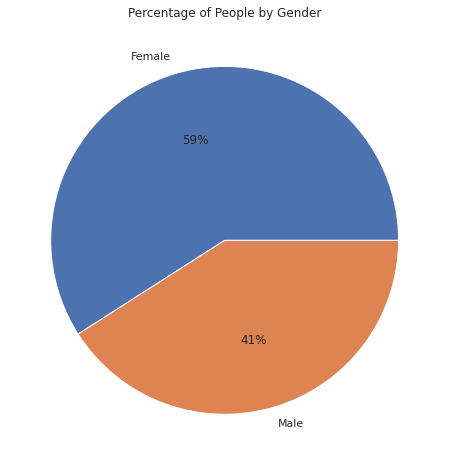

In [ ]:
# Plot showing gender representation of study participants
plt.figure(figsize=(12,8))
data['gender_of_respondent'].value_counts().plot(kind='pie',title='Percentage of People by Gender',ylabel ="",autopct='%1.f%%');

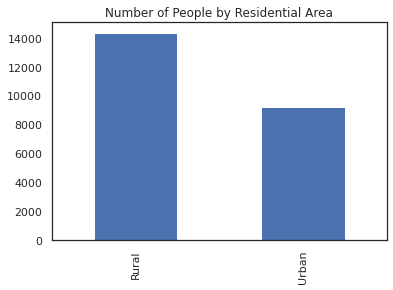

In [ ]:
# Plot showing number of participants by residence
data['Type of Location'].value_counts().plot(kind='bar',title='Number of People by Residential Area');

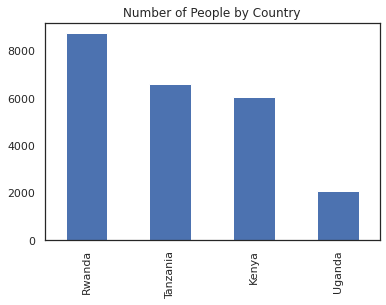

In [ ]:
# Plot showing number of participants by country
data['country'].value_counts().plot(kind='bar',title='Number of People by Country');

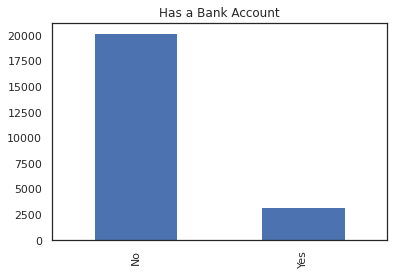

In [ ]:
# Plot showing number of participants who own a bank account
data['Has a Bank account'].value_counts().plot(kind='bar',title='Has a Bank Account');

In [ ]:
# Average house hold size
data.household_size.mean()

3.6798163577622853

In [ ]:
# Average respondent age by country
pd.DataFrame(data.groupby('country').mean()['Respondent Age'])

,Respondent Age
country,
Kenya,39.613876
Rwanda,39.272031
Tanzania,38.459279
Uganda,35.460733


#### Summary of Data Exploration

* Gender - we can see that approximately 59% of participants in the survey are female and 41% were male
* Location - 14353 respondents live in rural settlements and 9171 live in urban settlements
* Country - 8749 respondents are from Rwanda, 6606 are from Tanzania, 6068 are from Kenya, 2101 are from Uganda
* Bank account ownership - 20215 respondents do not have bank accounts and 3309 have bank accounts


***
### 4. Data Visualization <a name="visualization"></a>
***

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


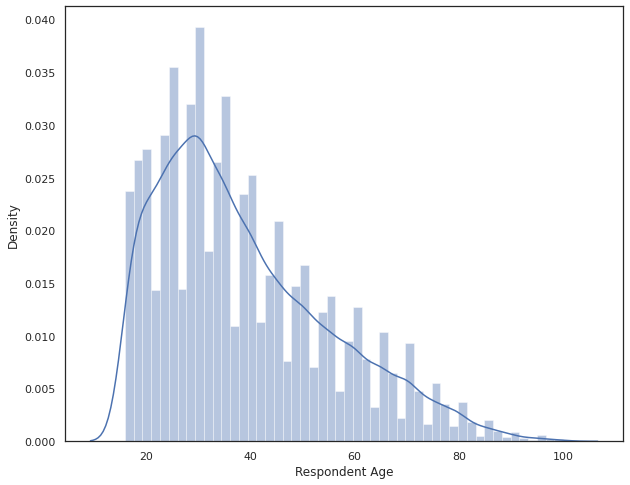

In [ ]:
#Distribution of participants by age
plt.figure(figsize=(10,8));
sns.distplot(data['Respondent Age']);
plt.show();

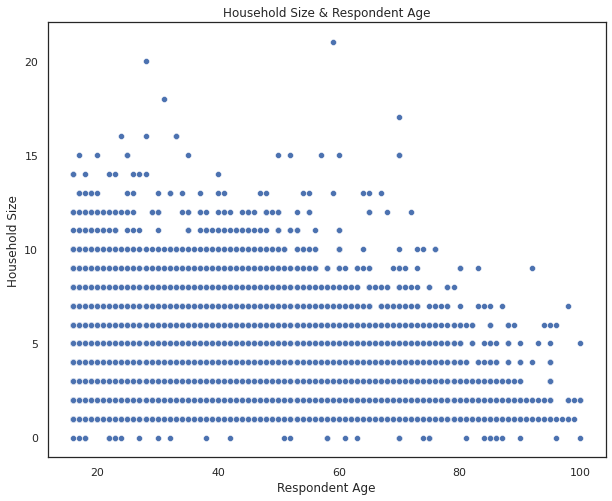

In [ ]:
# Household size plotted against respondent age
plt.figure(figsize=(10,8))
chart = sns.scatterplot(data=data, x='Respondent Age',y='household_size')
plt.ylabel('Household Size')
plt.title('Household Size & Respondent Age')
plt.show()

In [ ]:
# Function to calculate number of people with a bank account by country
def bank_account(data):
  return 1 if data['Has a Bank account'] == 'Yes' else 0

data['bank_account'] = data.apply(bank_account, axis=1)

In [ ]:
#Pivot table showing number of people with a bank account
table = pd.pivot_table(data,index=['country','Has a Bank account'],values='bank_account',aggfunc='count')
table

bank_account
country  Has a Bank account              
Kenya    No                          4547
         Yes                         1521
Rwanda   No                          7746
         Yes                         1003
Tanzania No                          6002
         Yes                          604
Uganda   No                          1920
         Yes                          181

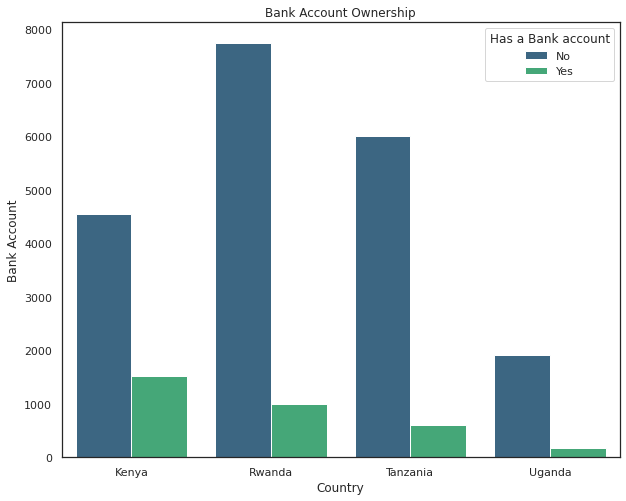

In [ ]:
# Plot bank account ownership
table = table.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = table,x='country',y='bank_account',hue='Has a Bank account',palette='viridis')
plt.title('Bank Account Ownership')
plt.xlabel('Country')
plt.ylabel('Bank Account')
plt.show();

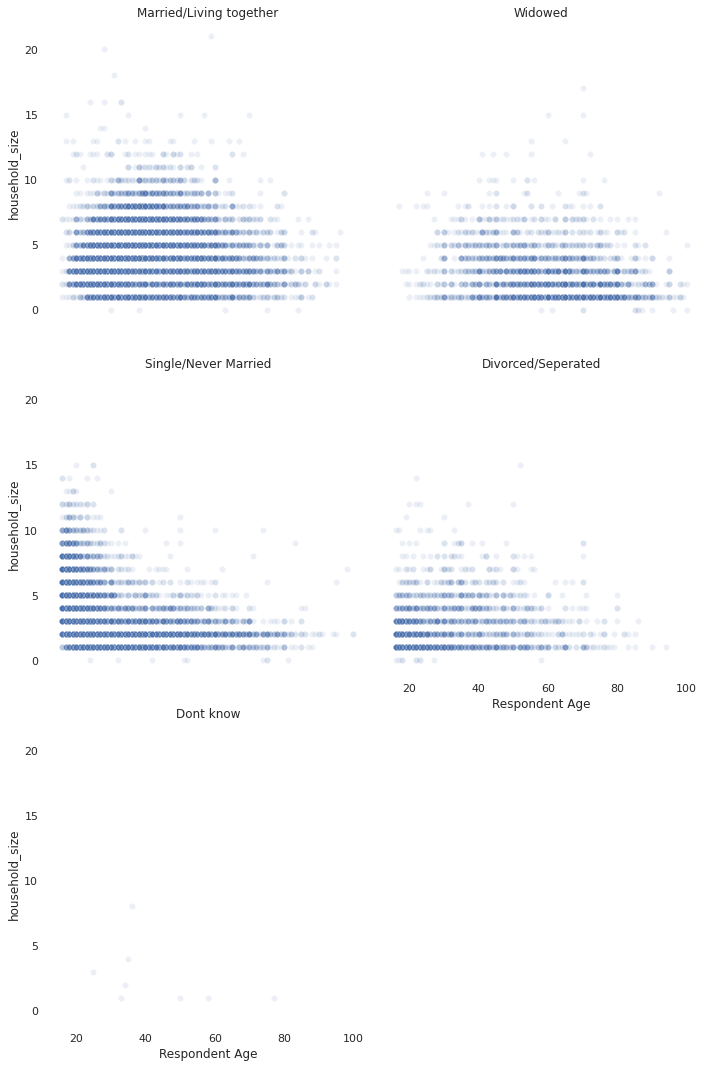

In [ ]:
# Plot grid of household size and respondent age by marital status
plot = sns.relplot(y='household_size', x='Respondent Age', data=data, col='marital_status', col_wrap=2, alpha=.1);
sns.despine(left=True, bottom=True)
for item, ax in plot.axes_dict.items():
     ax.grid(False, axis='x')
     ax.set_title(item)

In [ ]:
#Pivot table showing number of people by Type of Location
rural_urban = pd.pivot_table(data,index=['country','Type of Location'],
                             values='bank_account',aggfunc='count')
rural_urban

bank_account
country  Type of Location              
Kenya    Rural                     3543
         Urban                     2525
Rwanda   Rural                     7486
         Urban                     1263
Tanzania Rural                     1816
         Urban                     4790
Uganda   Rural                     1508
         Urban                      593

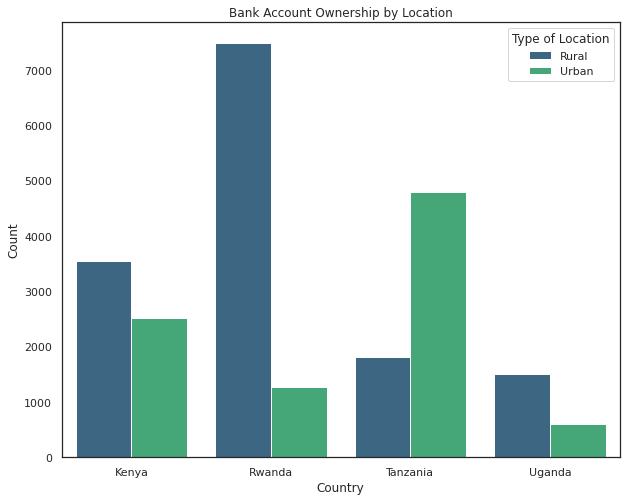

In [ ]:
# Plot bank account ownership by Type of location
rural_urban = rural_urban.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = rural_urban,x='country',y='bank_account',hue='Type of Location',palette='viridis')
plt.title('Bank Account Ownership by Location')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show();

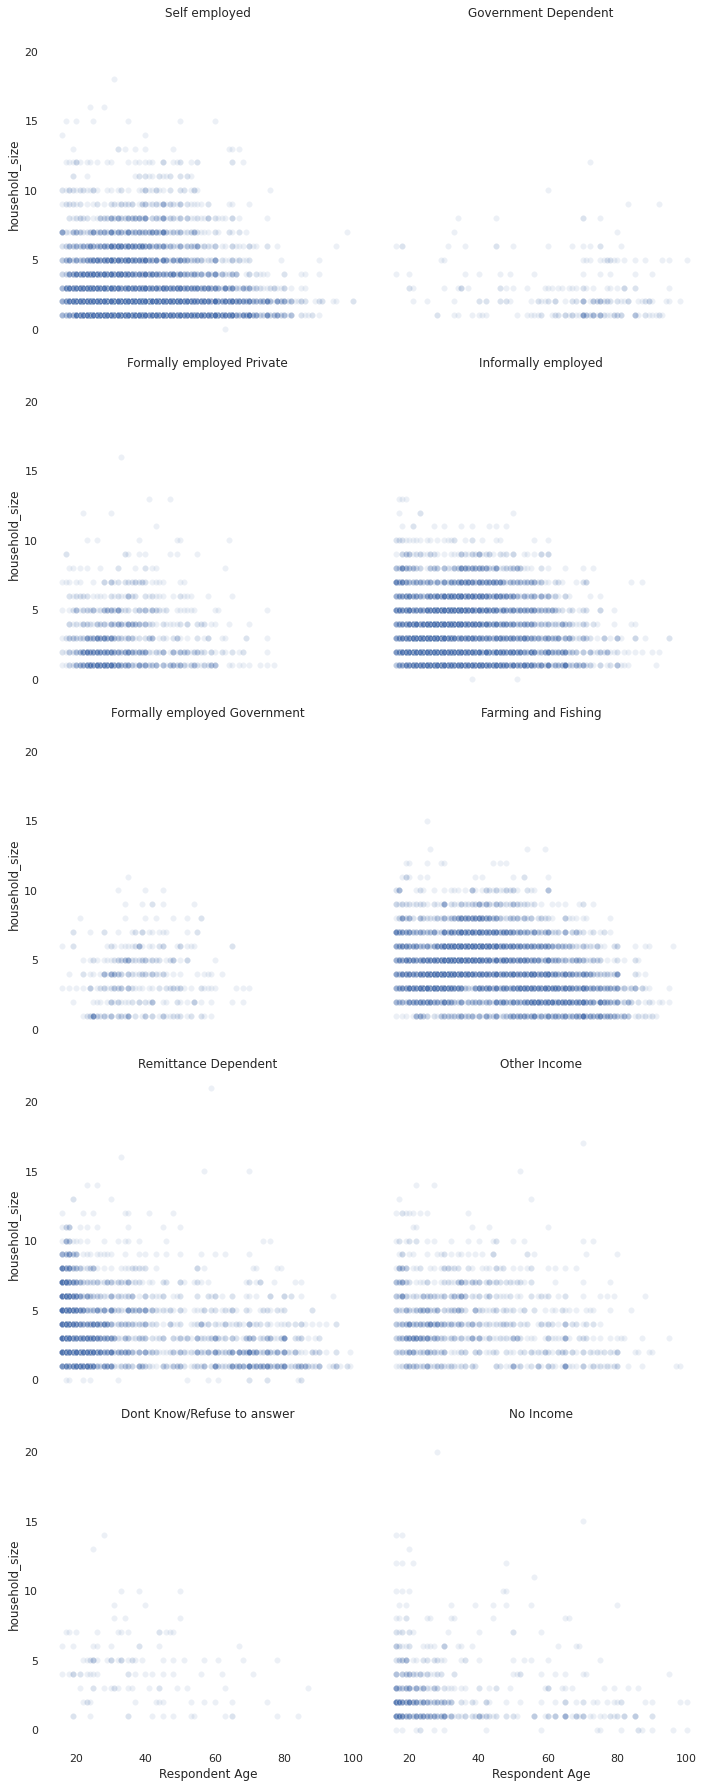

In [ ]:
# Plot grid of household size and respondent age by job
plot3 = sns.relplot(y='household_size', x='Respondent Age', data=data, col='Type of Job', col_wrap=2, alpha=.1)
sns.despine(left=True, bottom=True)
for item, ax in plot3.axes_dict.items():
     ax.grid(False, axis='x')
     ax.set_title(item)

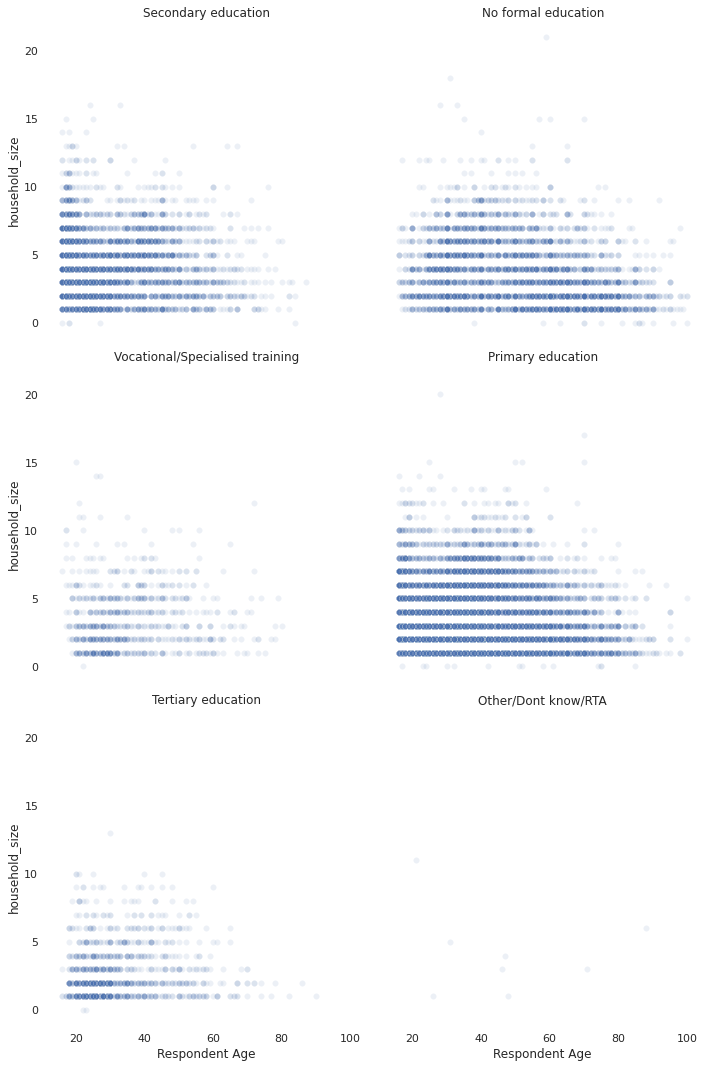

In [ ]:
# Plot grid of household size and respondent age by education
plot4 = sns.relplot(y='household_size', x='Respondent Age', data=data, col='Level_of_Education', col_wrap=2, alpha=.1)
sns.despine(left=True, bottom=True)
for item, ax in plot4.axes_dict.items():
     ax.grid(False, axis='x')
     ax.set_title(item)

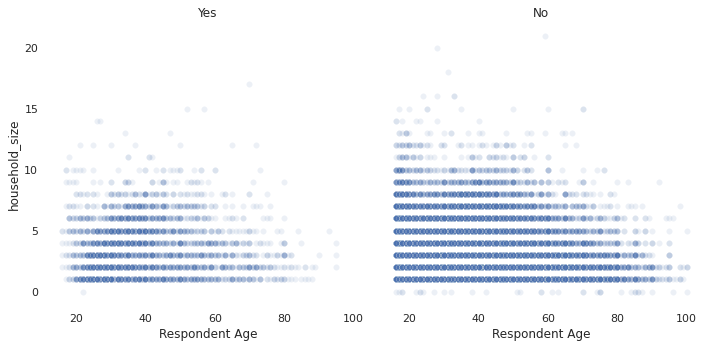

In [ ]:
# Plot grid of household size and respondent age by bank account ownership
plot5 = sns.relplot(y='household_size', x='Respondent Age', data=data, col='Has a Bank account', col_wrap=2, alpha=.1)
sns.despine(left=True, bottom=True)
for item, ax in plot5.axes_dict.items():
     ax.grid(False, axis='x')
     ax.set_title(item)

***
### 5. Machine Learning <a name="ml"></a>
***

#### 5.1 Data Preprocessing <a name="preprocessing"></a>

In [ ]:
# Creating a copy of the data
data2 = data.copy()

In [ ]:
# Converting categorical text columns to numbers
label_encoder = LabelEncoder()
column_list = ['country','Has a Bank account', 'Type of Location',
       'Cell Phone Access','gender_of_respondent', 'relationship_with_head', 'marital_status',
       'Level_of_Education', 'Type of Job']

# Apply label encoder to all the above columns
for i in range(len(column_list)):
  data2[column_list[i]] = label_encoder.fit_transform(data[column_list[i]])


#### 5.2 Train Test Split <a name="train_test_split"></a>

In [ ]:
# Dropping 'bank account' column from train data
X = data2.drop(['Has a Bank account','bank_account'],axis=1)
y = data2['Has a Bank account']

In [ ]:
# Splitting data into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

#### 5.3 Decision Tree Classifier <a name="decision_tree"></a>

In [ ]:
# Initializing decision tree model
tree = DecisionTreeClassifier()

# Fitting the decision tree to the data
tree.fit(X_train,y_train)

# Decision tree prediction
prediction = tree.predict(X_test)

In [ ]:
# Print classification report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      6073
           1       0.41      0.42      0.41       985

    accuracy                           0.83      7058
   macro avg       0.66      0.66      0.66      7058
weighted avg       0.84      0.83      0.83      7058



In [ ]:
# Print confusion matrix
print(confusion_matrix(y_test,prediction))

[[5472  601]
 [ 573  412]]


#### 5.4 Random Forest <a name="random_forest"></a>

In [ ]:
# Initializing random forest model
forest = RandomForestClassifier(n_estimators=100,random_state=42)

# Fitting the model to training data
forest.fit(X_train,y_train)

# Random forest prediction
forest_prediction = forest.predict(X_test)

###### Feature Importance

In [ ]:
# Highlighting important feautures the model used
features_rf = pd.DataFrame({'feature': list(X.columns),
                  'importance': forest.feature_importances_})

features_rf.sort_values('importance', ascending=False,inplace=True)
print(features_rf)

                   feature  importance
5           Respondent Age    0.342808
9       Level_of_Education    0.156914
4           household_size    0.138837
10             Type of Job    0.127792
8           marital_status    0.041787
7   relationship_with_head    0.040984
2         Type of Location    0.037305
0                  country    0.036548
3        Cell Phone Access    0.032449
6     gender_of_respondent    0.023135
1                     year    0.021441


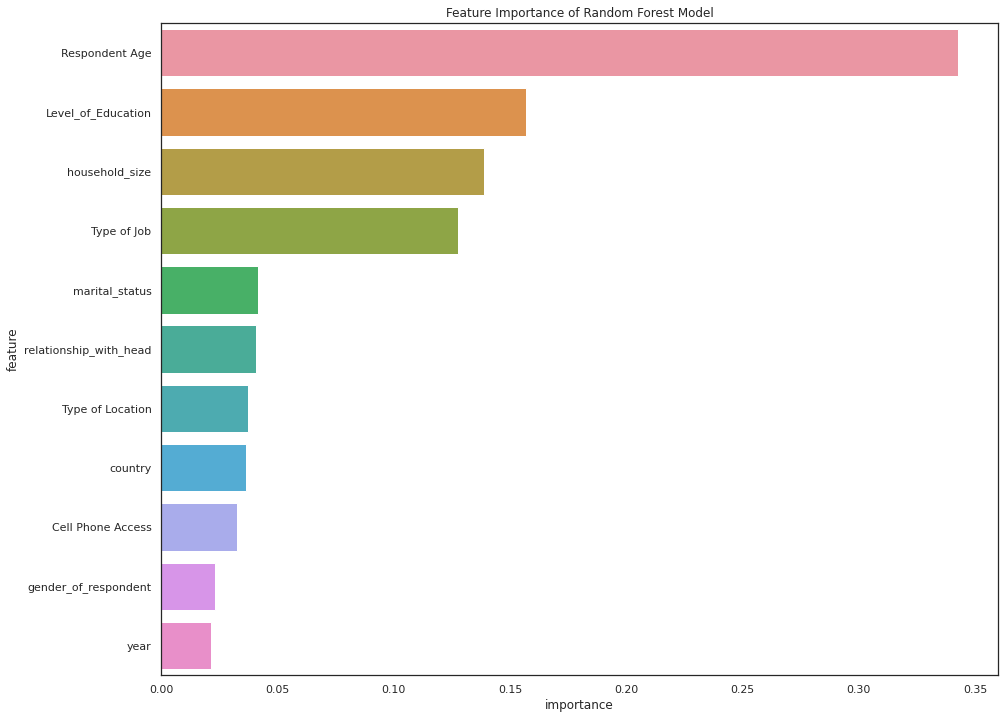

In [ ]:
# Plot showing feature importance
plt.figure(figsize=(15,12))
sns.barplot(data=features_rf,x='importance',y='feature',orient='h')
plt.title('Feature Importance of Random Forest Model')
plt.show()

This graph shows the impact that different features had on the model. Respondent age is the feature that had the highest importance.

In [ ]:
# Random forest classification report
print(classification_report(y_test,forest_prediction))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6073
           1       0.53      0.40      0.45       985

    accuracy                           0.87      7058
   macro avg       0.72      0.67      0.69      7058
weighted avg       0.85      0.87      0.86      7058



In [ ]:
# Random forest confusion matrix
print(confusion_matrix(y_test,forest_prediction))

[[5722  351]
 [ 595  390]]


#### Model Accuracy

In [ ]:
# Printing accuracy of both models
print("Accuracy of Predictive models: \n")
print(f"Decision Tree: {round(accuracy_score(y_test,prediction),5)}")
print(f"Random Forest: {round(accuracy_score(y_test,forest_prediction),5)}")

Accuracy of Predictive models: 

Decision Tree: 0.83366
Random Forest: 0.86597


#### 5.5 Model Predictions <a name="predictions"></a>

In this section, we will visualize which individuals are likely to have a bank account based on predictions made by the model.

In [ ]:
# creating results data frame
results = X_test.copy()

# creating column with model predictions
results['prediction'] = forest_prediction

In [ ]:
# correlation plot
correlation = results.corr ()
correlation.style.background_gradient(cmap = 'viridis')

,country,year,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,relationship_with_head,marital_status,Level_of_Education,Type of Job,prediction
country,1.000000,-0.098699,0.154900,-0.162200,-0.155197,-0.049318,-0.027612,0.145342,0.008687,-0.050768,0.388295,-0.182225
year,-0.098699,1.000000,0.197200,-0.052501,-0.037225,-0.011740,0.003827,0.009082,-0.033676,0.157778,0.229521,0.143002
Type of Location,0.154900,0.197200,1.000000,-0.091443,-0.263987,-0.055589,0.025899,0.027341,0.083314,0.138080,0.371740,0.117334
Cell Phone Access,-0.162200,-0.052501,-0.091443,1.000000,0.113049,-0.109631,0.120028,-0.048181,-0.097728,0.260006,-0.161132,0.196620
household_size,-0.155197,-0.037225,-0.263987,0.113049,1.000000,-0.119951,0.015266,0.082696,-0.113880,-0.002890,-0.195570,-0.051136
Respondent Age,-0.049318,-0.011740,-0.055589,-0.109631,-0.119951,1.000000,0.012313,-0.147057,0.229840,-0.356551,-0.104778,0.008862
gender_of_respondent,-0.027612,0.003827,0.025899,0.120028,0.015266,0.012313,1.000000,-0.455487,-0.105045,0.135221,-0.029356,0.120781
relationship_with_head,0.145342,0.009082,0.027341,-0.048181,0.082696,-0.147057,-0.455487,1.000000,-0.132302,-0.016103,0.038402,-0.069406
marital_status,0.008687,-0.033676,0.083314,-0.097728,-0.113880,0.229840,-0.105045,-0.132302,1.000000,-0.134648,0.055812,-0.028436
Level_of_Education,-0.050768,0.157778,0.138080,0.260006,-0.002890,-0.356551,0.135221,-0.016103,-0.134648,1.000000,0.058986,0.379662


In [ ]:
# Preprocessing data in results table
location = {1:'Urban',0:'Rural'}
gender = {0:'Female',1:'Male'}
level_of_education = {2:'Primary Education',0:'No formal education',3:'Secondary education',
                      4:'Tertiary education',5:'Vocational/Specialized Training',1:'Other/Dont know/RTA'}
job = {9:'Self employed',5:'Informally employed',1:'Farming and Fishing',8:'Remittance Dependent',
       7:'Other Income',3:'Formally employed Private',6:'No Income',2:'Formally employed Government',
       4:'Government Dependent',0:'Dont Know/Refuse to answer'}

results.replace({'Type of Location':location},inplace=True)
results.replace({'gender_of_respondent':gender},inplace=True)
results.replace({'Level_of_Education':level_of_education},inplace=True)
results.replace({'Type of Job':job},inplace=True)

In [ ]:
# Function to calculate number of people with a bank account
def prediction(df):
  return 'Yes' if df['prediction'] == 1 else 'No'

results['pred_results'] = results.apply(prediction,axis=1)

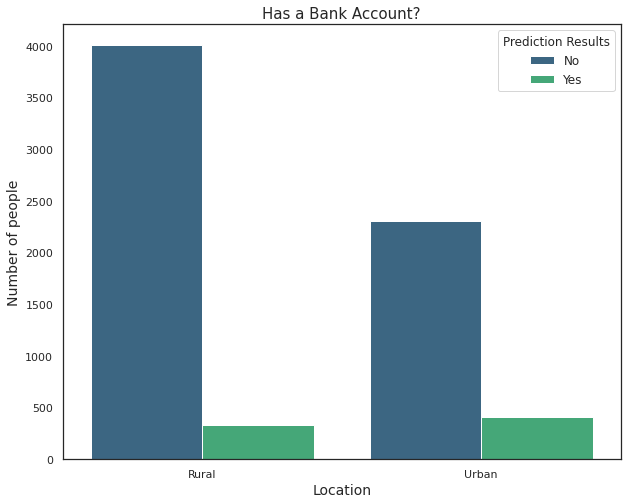

In [ ]:
#Create pivot table grouping data by location
location_pred = pd.pivot_table(data=results,index=['Type of Location','pred_results'],values='prediction',aggfunc='count')

#Plotting model predictions
location_pred = location_pred.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = location_pred,x='Type of Location',y='prediction',hue='pred_results',palette='viridis')
plt.title('Has a Bank Account?',fontsize=15)
plt.xlabel('Location',fontsize=14)
plt.legend(title='Prediction Results',fontsize=12)
plt.ylabel('Number of people',fontsize=14)
plt.show();

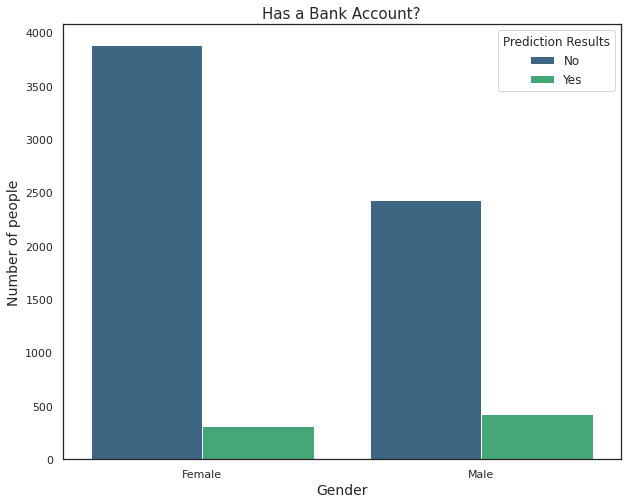

In [ ]:
#Create pivot table grouping data by gender
gender_pred = pd.pivot_table(data=results,index=['gender_of_respondent','pred_results'],values='prediction',aggfunc='count')

#Plotting model predictions
gender_pred = gender_pred.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = gender_pred,x='gender_of_respondent',y='prediction',hue='pred_results',palette='viridis')
plt.title('Has a Bank Account?',fontsize=15)
plt.xlabel('Gender',fontsize=14)
plt.legend(title='Prediction Results',fontsize=12)
plt.ylabel('Number of people',fontsize=14)
plt.show();

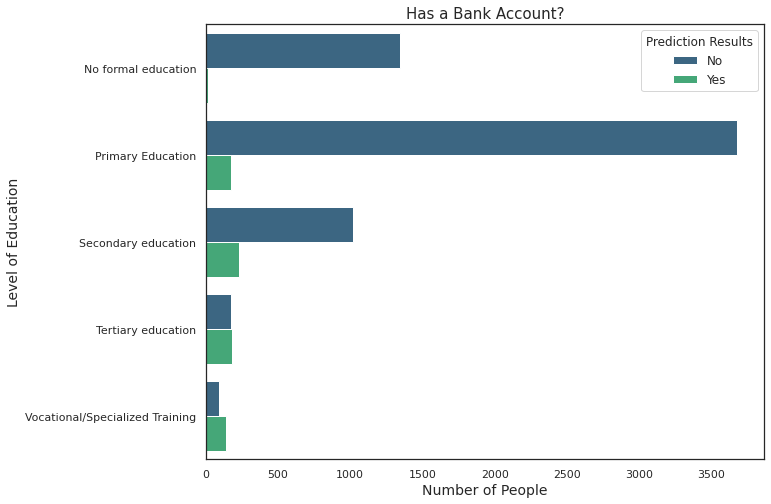

In [ ]:
#Create pivot table grouping data by education
education_pred = pd.pivot_table(data=results,index=['Level_of_Education','pred_results'],
                                values='prediction',aggfunc='count')

#Plotting model predictions
education_pred = education_pred.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = education_pred[education_pred['Level_of_Education']!='Other/Dont know/RTA'],x='prediction',y='Level_of_Education',
            hue='pred_results',palette='viridis')
plt.title('Has a Bank Account?',fontsize=15)
plt.xlabel('Number of People',fontsize=14)
plt.legend(title='Prediction Results',fontsize=12)
plt.ylabel('Level of Education',fontsize=14)
plt.show();

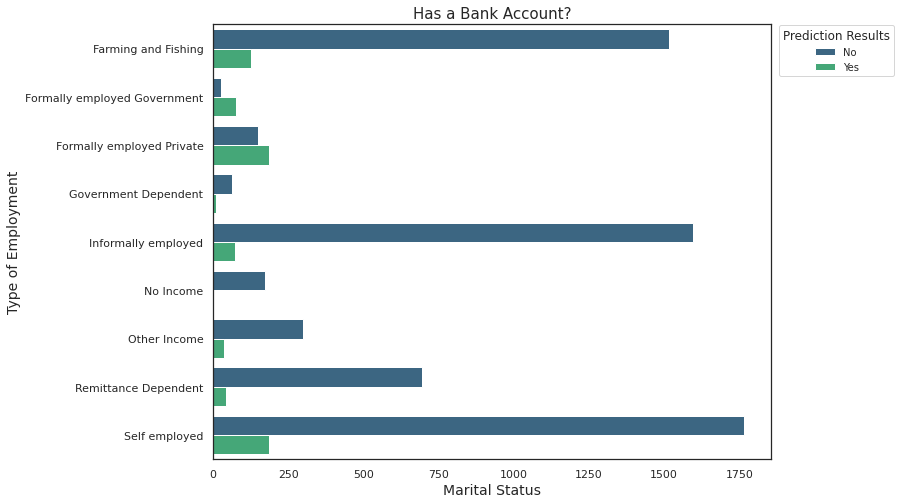

In [ ]:
#Create pivot table grouping data by type of job
job_pred = pd.pivot_table(data=results,index=['Type of Job','pred_results'],values='prediction',aggfunc='count')

#Plotting model predictions
job_pred = job_pred.reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data = job_pred[job_pred['Type of Job']!='Dont Know/Refuse to answer'],x='prediction',y='Type of Job',hue='pred_results',palette='viridis')
plt.title('Has a Bank Account?',fontsize=15)
plt.xlabel('Marital Status',fontsize=14)
plt.legend(title='Prediction Results',fontsize=10,bbox_to_anchor=[1.23,0.94], loc='center right')
plt.ylabel('Type of Employment',fontsize=14)
plt.show();

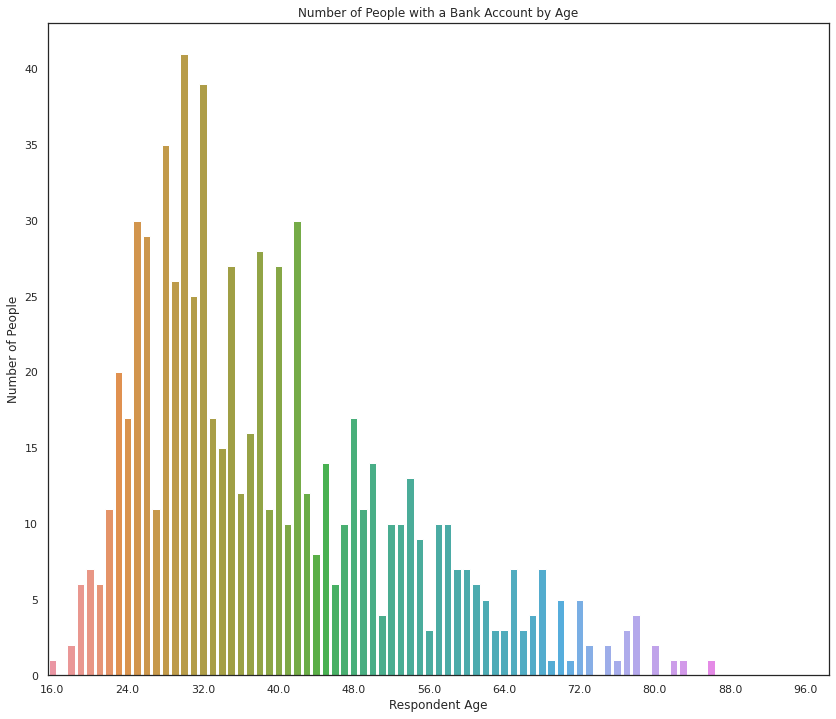

In [ ]:
#Grouping dataset by age
fig = pd.DataFrame(results.groupby('Respondent Age')['prediction'].sum())

# Creating chart
plt.figure(figsize=(14,12))
chart = sns.barplot(data=fig,x=fig.index,y='prediction')
plt.title('Number of People with a Bank Account by Age')
plt.ylabel("Number of People")

# Reducing x tick labels
for index, label in enumerate(chart.get_xticklabels()):
   if index % 8 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()

### Summary:
From the model, and the visualizations above, we can arrive at the following conclusions:

* Location - the model predicted that you are more likely to have a bank account if you live in urban areas.
* Gender - men are more likely to have a bank account than women.
* Education - individuals with tertiary or vocational(specialized) training are more likely to have a bank account.
* Job Type - formally employed government and private sector professionals are more likely to have a bank account than professionals who are self-employed or in the informal sector.
* Age - Bank account ownership tends to increase when people are younger, then decrease as they get older.

#### 5.5 Hyperparameter Optimization <a name="tuning"></a>

Here we will try to improve the performance of the random forest model using GridSearchCV

In [ ]:
# Creating parameters for GridSearchCV
parameters = {'n_estimators':range(10,300,10),
              'criterion':['entropy'],
              'max_features':['auto','sqrt','log2']}

# Initializing GridSearch
grid_search = GridSearchCV(estimator=forest,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=3)

In [ ]:
# Fitting GridSearchCV to training data
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': range(10, 300, 10)},
             scoring='accuracy')

In [ ]:
# Printing best model parameters
print(grid_search.best_estimator_)

RandomForestClassifier(criterion='entropy', n_estimators=240, random_state=42)


##### Using GridSearchCV we are able to acheive slightly better performance in the model

In [ ]:
# Print Accuracy scores
print("Model Evaluation\n")
print(f"The Random Forest model acheived an accuracy of approximately {(round(accuracy_score(y_test,forest_prediction),6)*100)}%.")
print(f"Using Grid Search we improved the performance of the model to approximately {round(grid_search.best_score_,6)*100}%.")

Model Evaluation

The Random Forest model acheived an accuracy of approximately 86.5968%.
Using Grid Search we improved the performance of the model to approximately 86.7424%.
